# **1. The bank's management team wants to know if there's any significant relationship between credit risk and the purpose of the loan. Conduct a statistical test to reach an answer.**
> **a. Clearly state the null and alternative hypothesis.**

> **b. What is the conclusion of the hypothesis test? In other words, what do you tell the management team?**

a. The null and alternative hypotheses are as follows:

> H0: Credit risk and the purpose of the loan are independent

> H1:Credit risk and the purpose of the loan are not independent

b. A chi-squared test is needed to see if there is a significant relationship between a client's credit risk and the purpose of their loan. Based on the results of this test, the p-value, 0.01151, is less than 0.05. This means that we will reject the null hypothesis and accept the alternative hypothesis. Based on the data, I would then tell the management team that there is a significant relationship between a client's credit risk and their loan purpose.

In [3]:
# Install Packages to read the Excel file
#install.packages("readxl")

library("readxl")

cred_data <- read_excel("/content/sample_data/CreditRiskData_HW3.xlsx")

# Chi-square test for independence
chisq.test(cred_data$CreditRisk, cred_data$LoanPurpose, correct = FALSE)



Warning message in chisq.test(cred_data$CreditRisk, cred_data$LoanPurpose, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  cred_data$CreditRisk and cred_data$LoanPurpose
X-squared = 21.27, df = 9, p-value = 0.01151


# **3. The management team wants to know if the average savings are the same across credit risk.**

>**a. Compare the box-plot of average savings across credit risk. Are they similar? You can also do a crosstab of the average savings by credit risk to have a better idea.**

> **b. Clearly state the null and alternative hypothesis**

> **c. Check the assumptions of the test using both the QQ-plot and the AD-test.**

> **d. What is the conclusion of the QQ-plot and AD-test? Do they agree with each other?**

  > **i. Was the normality assumption violated? If so, then use the Mann-Whitney
U test. The function for that is as follows: wilcox.test(categorical_variable ~ numeric_variable, data = name_of_data,exact = FALSE)**

    > H1: group means are the same

    > H2: group means are NOT the same



> a. At fist glance, the two boxplots look similar and appear to have similar means. However, looking at the crosstab we can see that they are actually different as the means "Default" and "NoDefault" are completely different.

> b. The null and alternative hypotheses are as follows:

    > H0: The two variables, 'Savings' and 'CreditRisk' are independent

    > H1: The two variables, 'Savings' and 'CreditRisk' are not independent

> d.The QQ and AD test results do agree with eachother as both do not follow a  normal distrabution.

> The null and alternative hypotheses for the AD-test are as follows:

    > H0: The data follows a normal distradution

    > H1: The data does not follow a normal distrabution

> Because the p-value is significant and our data does not follow the normal distrabution line, the AD-test further proves why we should reject the null hypothesis.

> i. The hypotheses for the Mann-Whitney U test are as follows:
    
    >  H0: Group means are the same

    >  H1:group means are not the same.

> This test tells us that the p-value is not significant and will accept the null hypothesis

    Group.1        x
1   Default 1487.957
2 NoDefault 2132.617


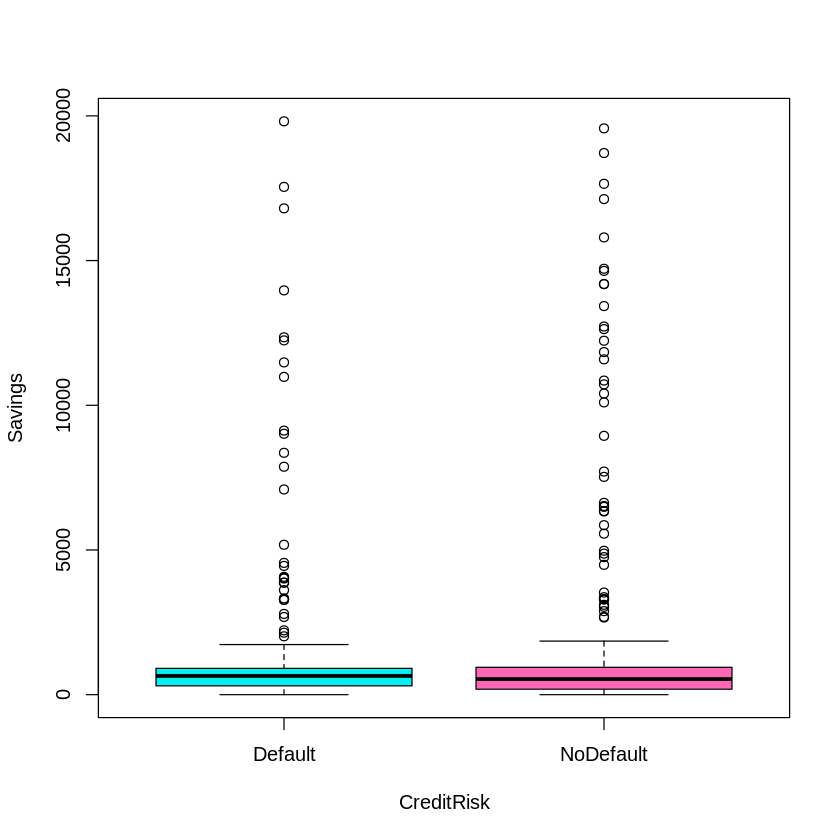

In [5]:
# Create a boxplot
boxplot(Savings ~ CreditRisk, data = cred_data, col=c("cyan2", "hotpink"))

# Create a crosstab top confirm or deny the boxplot
print(aggregate(cred_data$Savings, list(cred_data$CreditRisk),FUN = mean))

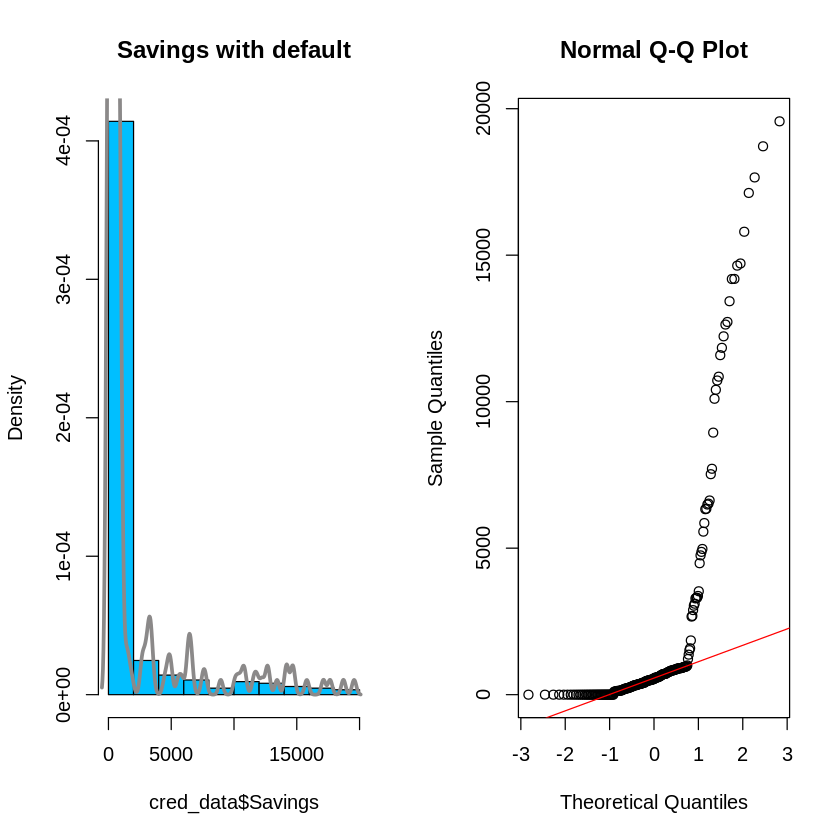

In [35]:
#C:
# Creating a side-by-side plots
par(mfrow = c(1, 2))

# Creating data corresponding to the "Default" group.
cred_Default <- cred_data[cred_data$CreditRisk == 'NoDefault', ]

# Histogram of 'Savings' for those with 'Default'.
hist(cred_data$Savings, col = "deepskyblue", main = "Savings with default", freq = FALSE)
lines(density(cred_Default$Savings), lwd = 3, col = "snow4")

# Providing a QQ-plot
qqnorm(cred_Default$Savings)
qqline(cred_Default$Savings, col = 'red')

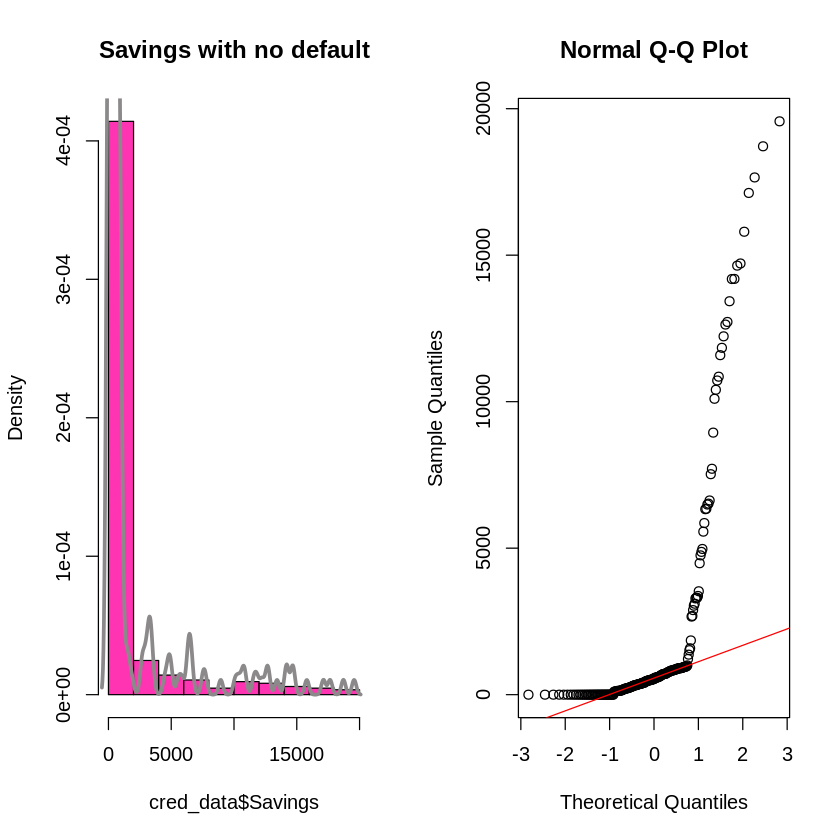

In [44]:
#C:(continued)
# Creating a side-by-side plots
par(mfrow = c(1, 2))

# Creating data corresponding to the "No Default" group.
cred_NoDefault <- cred_data[cred_data$CreditRisk == 'NoDefault', ]

# Histogram of 'Savings' for those with 'No Default'.
hist(cred_data$Savings, col = "maroon1", main = "Savings with no default", freq = FALSE)
lines(density(cred_NoDefault$Savings), lwd = 3, col = "snow4")

# Providing a QQ-plot
qqnorm(cred_NoDefault$Savings)
qqline(cred_NoDefault$Savings, col = 'red')

In [61]:
#C:(continued)
#install.packages("nortest")
library("nortest")

# AD test for those with 'Default'
ad.test(cred_Default$Savings)

# AD test for those with 'NoDefault'
ad.test(cred_NoDefault$Savings)


	Anderson-Darling normality test

data:  cred_Default$Savings
A = 39.91, p-value < 2.2e-16



	Anderson-Darling normality test

data:  cred_NoDefault$Savings
A = 39.91, p-value < 2.2e-16


In [45]:
# Performing the Mann-Whitney U test.
wilcox.test(Savings ~ CreditRisk, data = cred_data, exact = FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Savings by CreditRisk
W = 23679, p-value = 0.3836
alternative hypothesis: true location shift is not equal to 0


# **4. Having done the previous analysis, management wants to know if the average length of time the client has been a customer across housing is the same.**

> **a. Provide a boxplot and a crosstab. Comment on what you see.**

> **b. Clearly state the null and alternative hypothesis**

> **c. Check the assumptions of the test using both QQ-plot and AD-test.**

> **d. What is the conclusion of the QQ-plot and AD-test? Do they agree with each other?**

  > **i. Was the normality assumption violated? If so, use the non-parametric
version. If you’re using the non-parametric version, make sure you state
that hypothesis in part b.**


> a. I notice that those in the other category tend to have been customers longer than those who own or buy.

> b. The null and alternative hypotheses are as follows:

    > H0: The two variables, 'MonthsCustomer' and 'Housing' are independent

    > H1: The two variables, 'MonthsCustomer' and 'Housing' are not independent

> d. The QQ-plots and AD-test agrees with each other that the variables are not related as they do not follow the reference line.The AD-test further proves this point as the p-values for each group are statistically significiant, giving us enough evidence to reject the null hypothesis and accept the alternative hypothesis.

> i. The normality assumption was violated based on the QQ plots and AD-test.The KW-test tells us that the p-value is statistically significant meaning we have evidence to reject the null hypothesis

  Group.1        x
1   Other 32.34615
2     Own 21.82192
3    Rent 20.70370


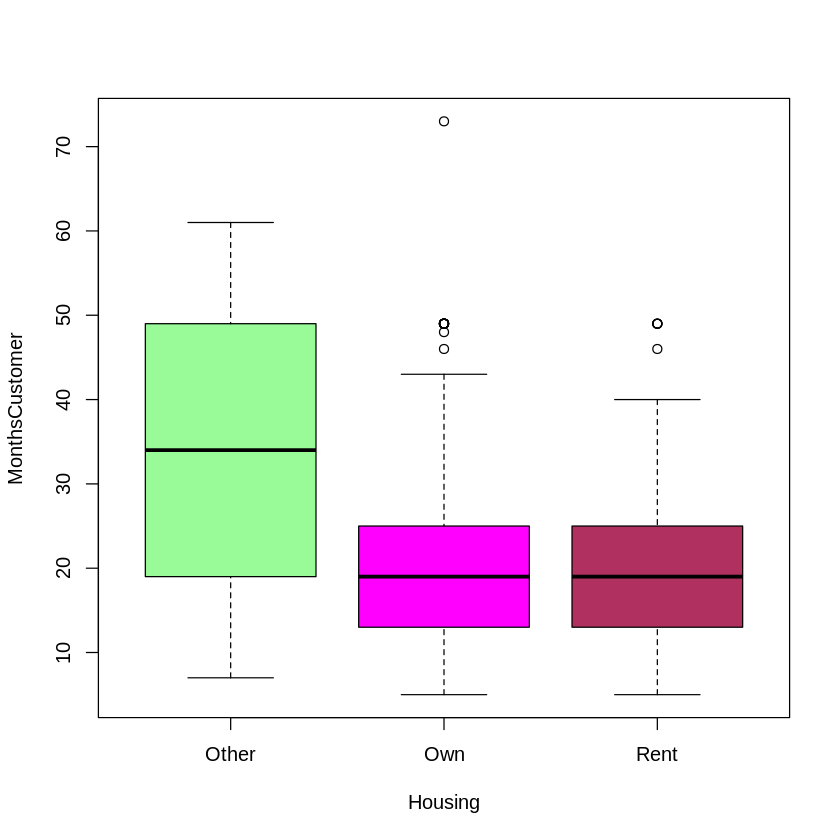

In [28]:
# Create a boxplot
boxplot(MonthsCustomer ~ Housing, data = cred_data, col=c("palegreen", "magenta", "maroon"))

# Create a crozztab top confirm or deny the boxplot
print(aggregate(cred_data$MonthsCustomer, list(cred_data$Housing),FUN = mean))

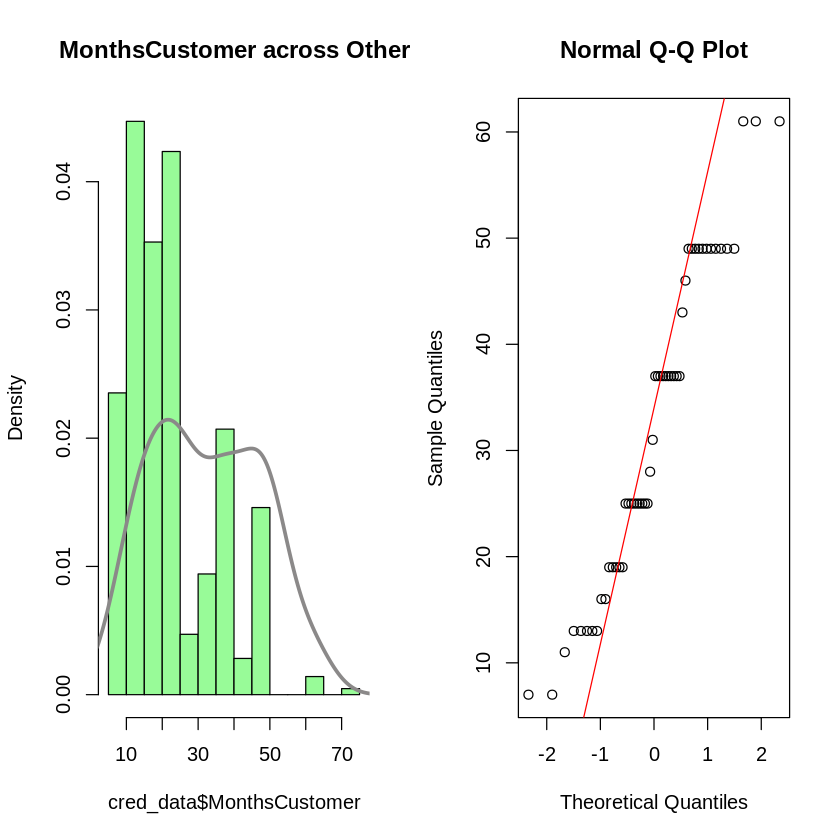

In [47]:
#C:
# Creating a side-by-side plots
par(mfrow = c(1, 2))

# Create data corresponduing to the "Other" group
cred_Other <- cred_data[cred_data$Housing == 'Other', ]

# Provide a histogram of 'MonthsCustomer' for those under 'Other'.
hist(cred_data$MonthsCustomer, col = "palegreen", main = "MonthsCustomer across Other", freq = FALSE)
lines(density(cred_Other$MonthsCustomer), lwd = 3, col = "snow4")

#providing a QQ plot
qqnorm(cred_Other$MonthsCustomer)
qqline(cred_Other$MonthsCustomer, col = 'red')

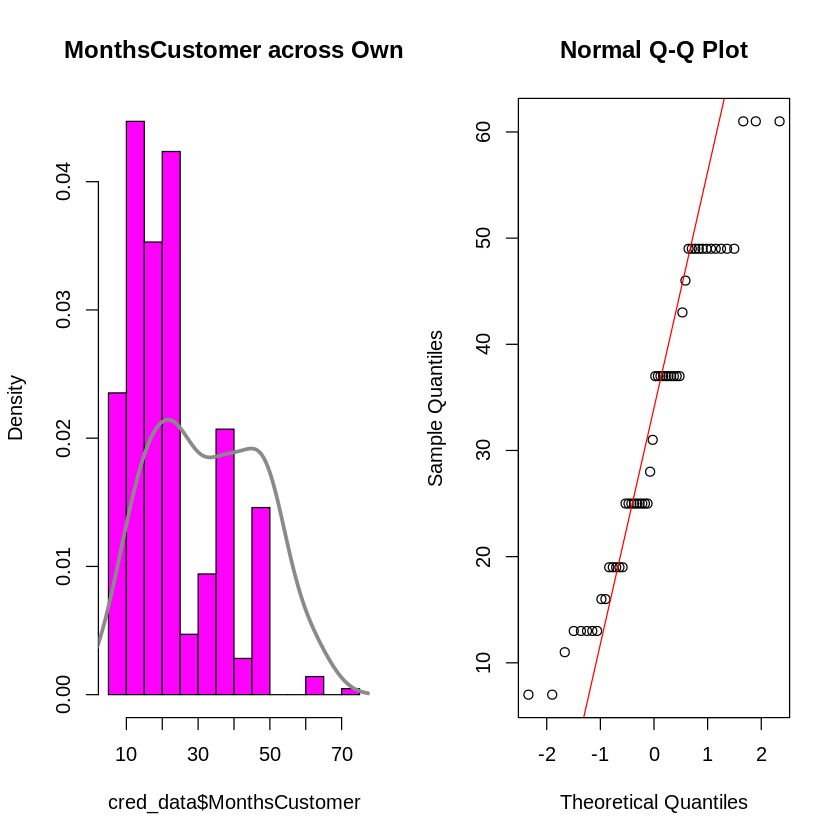

In [52]:
#C:
# Creating a side-by-side plots
par(mfrow = c(1, 2))

# Create data corresponduing to the "Own" group
cred_Own <- cred_data[cred_data$Housing == 'Other', ]

# Provide a histogram of 'MonthsCustomer' for those under 'Own'.
hist(cred_data$MonthsCustomer, col = "magenta", main = "MonthsCustomer across Own", freq = FALSE)
lines(density(cred_Own$MonthsCustomer), lwd = 3, col = "snow4")

#providing a QQ plot
qqnorm(cred_Own$MonthsCustomer)
qqline(cred_Own$MonthsCustomer, col = 'red')

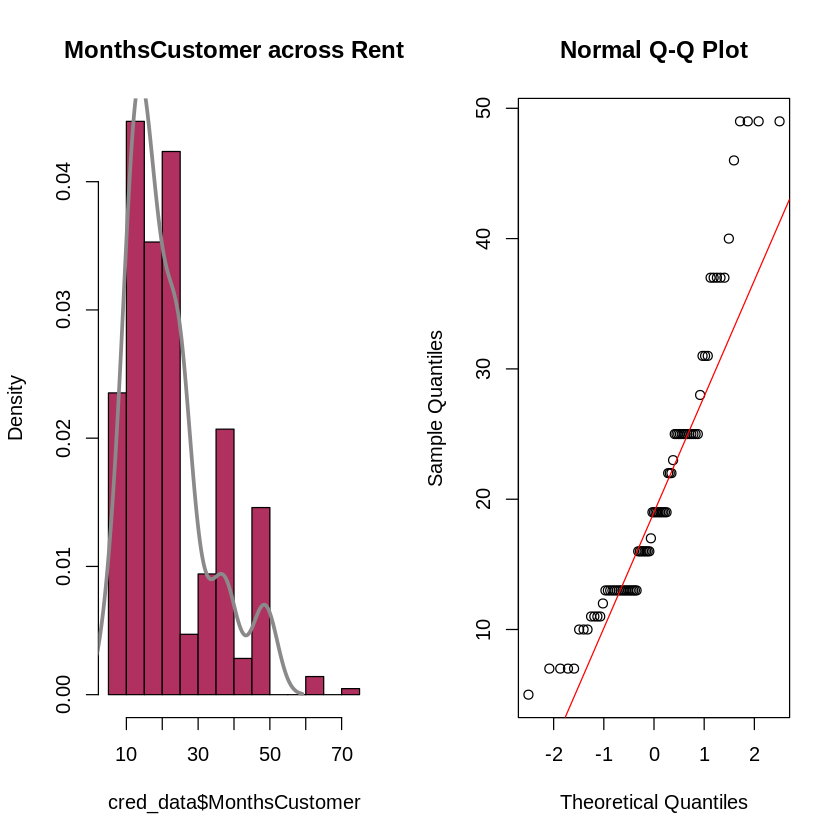

In [51]:
#C:
# Creating a side-by-side plots
par(mfrow = c(1, 2))

# Create data corresponduing to the "Rent" group
cred_Rent <- cred_data[cred_data$Housing == 'Rent', ]

# Provide a histogram of 'MonthsCustomer' for those under 'Rent'.
hist(cred_data$MonthsCustomer, col = "maroon", main = "MonthsCustomer across Rent", freq = FALSE)
lines(density(cred_Rent$MonthsCustomer), lwd = 3, col = "snow4")

#providing a QQ plot
qqnorm(cred_Rent$MonthsCustomer)
qqline(cred_Rent$MonthsCustomer, col = 'red')

In [54]:
#C:
# AD-test for each group

# AD test for those under 'Other'
ad.test(cred_Other$Savings)

# AD test for those with 'Own'
ad.test(cred_Own$Savings)

# AD test for those with 'Rent'
ad.test(cred_Rent$Savings)


	Anderson-Darling normality test

data:  cred_Other$Savings
A = 8.563, p-value < 2.2e-16



	Anderson-Darling normality test

data:  cred_Own$Savings
A = 8.563, p-value < 2.2e-16



	Anderson-Darling normality test

data:  cred_Rent$Savings
A = 12.886, p-value < 2.2e-16


In [59]:
#install.packages('FSA')
library('FSA')
# KW-test
kruskal.test(MonthsCustomer ~ Housing, data = cred_data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Kruskal-Wallis rank sum test

data:  MonthsCustomer by Housing
Kruskal-Wallis chi-squared = 25.094, df = 2, p-value = 3.555e-06


# **5. As an extension of question 4, conduct a post hoc test to decide which group has the same or different mean. What do you tell management now?**

I would tell management that two of the groups, Other-Own and Other-Rent are statistically signficant and should be considerd in decision making.Own - Rent should not be considerd or further research needs to be done to deturmine if it is significant.

In [60]:
# Post-hoc test
dunnTest(MonthsCustomer ~ Housing, data = cred_data)

Warning message:
“Housing was coerced to a factor.”
Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Holm method.




    Comparison        Z      P.unadj        P.adj
1  Other - Own 4.729554 2.250133e-06 6.750398e-06
2 Other - Rent 4.547923 5.417792e-06 1.083558e-05
3   Own - Rent 0.766650 4.432896e-01 4.432896e-01